多項式回帰の実装

$
    f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2
$

$
    f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \cdots + \theta_nx^n
$

更新式

$
    \theta_k := \theta_k - \eta \sum^{n}_{i=1}(f_\theta(x^{(i)}) - y{(i)})x{(i)k}
$



重回帰

$
    f_\theta(x_1, \cdots, x_n) = \theta_0 + \theta_1x_1 + \theta_2x_2, \cdots, \theta_nx_n
$

$
    f_\theta(x) = \theta^Tx
$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('./click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)


In [20]:
# 予測関数
def f(x):
    return np.dot(x, theta)

更新式

$
    \theta_j := \theta_j - \eta \sum_{i=1}^{n}(f_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$

目的関数(平均二乗誤差)

$
    \frac{1}{n} \sum_{i=1}^n(y^{(i)} - f_\theta(x^{(i)}))^2
$

In [ ]:

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [17]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [9.494292   2.6862577  9.08571565], 差分 = 153228.3533
2回目: theta = [17.70569184  4.51471145 17.49937657], 差分 = 137949.7991
3回目: theta = [25.58459047  6.31826739 25.3847754 ], 差分 = 124278.7031
4回目: theta = [33.14820316  8.0966907  32.77154322], 差分 = 112043.8219
5回目: theta = [40.41280823  9.84979234 39.68767546], 差分 = 101092.2154
6回目: theta = [47.39379856 11.57742587 46.15962205], 差分 = 91287.2882
7回目: theta = [54.10573014 13.2794845  52.21237244], 差分 = 82507.0413
8回目: theta = [60.56236809 14.95589823 57.86953608], 差分 = 74642.5101
9回目: theta = [66.77673001 16.60663119 63.15341838], 差分 = 67596.3704
10回目: theta = [72.76112704 18.2316792  68.08509255], 差分 = 61281.6928
11回目: theta = [78.52720265 19.83106738 72.68446742], 差分 = 55620.8312
12回目: theta = [84.08596925 21.40484797 76.97035162], 差分 = 50544.4295
13回目: theta = [89.44784283 22.95309824 80.9605141 ], 差分 = 45990.5354
14回目: theta = [94.62267569 24.47591859 84.67174147], 差分 = 41903.8079
15回目: theta = [99.61978735 25.97343068 88

373回目: theta = [394.20337814  95.83733329  29.89430171], 差分 = 13.7715
374回目: theta = [394.30442454  95.83163081  29.83639974], 差分 = 13.5375
375回目: theta = [394.40460806  95.82596207  29.77899164], 差分 = 13.3076
376回目: theta = [394.50393606  95.82032706  29.72207319], 差分 = 13.0815
377回目: theta = [394.60241588  95.8147258   29.66564022], 差分 = 12.8592
378回目: theta = [394.70005476  95.80915828  29.60968858], 差分 = 12.6408
379回目: theta = [394.79685989  95.80362449  29.55421416], 差分 = 12.4260
380回目: theta = [394.89283841  95.79812443  29.4992129 ], 差分 = 12.2149
381回目: theta = [394.98799738  95.79265808  29.44468077], 差分 = 12.0074
382回目: theta = [395.08234382  95.7872254   29.39061375], 差分 = 11.8034
383回目: theta = [395.17588467  95.78182638  29.33700789], 差分 = 11.6029
384回目: theta = [395.26862682  95.77646097  29.28385925], 差分 = 11.4058
385回目: theta = [395.3605771   95.77112915  29.23116392], 差分 = 11.2121
386回目: theta = [395.45174228  95.76583087  29.17891806], 差分 = 11.0216
387回目: theta = [395.

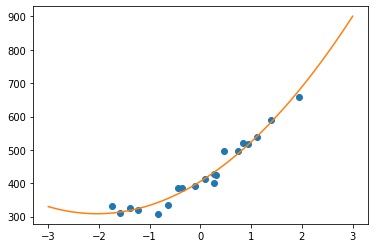

In [18]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()